In [1]:
import pandas as pd

In [4]:
customer = pd.read_csv('customer.csv', sep=';')
transaction = pd.read_csv('transaction.csv', sep=';')

In [16]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            4000 non-null   int64 
 1   first_name             4000 non-null   object
 2   last_name              3875 non-null   object
 3   gender                 4000 non-null   object
 4   DOB                    3913 non-null   object
 5   job_title              3494 non-null   object
 6   job_industry_category  3344 non-null   object
 7   wealth_segment         4000 non-null   object
 8   deceased_indicator     4000 non-null   object
 9   owns_car               4000 non-null   object
 10  address                4000 non-null   object
 11  postcode               4000 non-null   int64 
 12  state                  4000 non-null   object
 13  country                4000 non-null   object
 14  property_valuation     4000 non-null   int64 
dtypes: int64(3), object(1

In [17]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    20000 non-null  int64 
 1   product_id        20000 non-null  int64 
 2   customer_id       20000 non-null  int64 
 3   transaction_date  20000 non-null  object
 4   online_order      19640 non-null  object
 5   order_status      20000 non-null  object
 6   brand             19803 non-null  object
 7   product_line      19803 non-null  object
 8   product_class     19803 non-null  object
 9   product_size      19803 non-null  object
 10  list_price        20000 non-null  object
 11  standard_cost     19803 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.8+ MB


In [18]:
transaction['transaction_date'] = pd.to_datetime(transaction['transaction_date'], format='%d.%m.%Y')

In [76]:
transaction['standard_cost'] = transaction['standard_cost'].str.replace(',', '.').astype(float)
transaction['list_price'] = transaction['list_price'].str.replace(',', '.').astype(float)

transaction['standard_cost'] = transaction['standard_cost'].astype(float)
transaction['list_price'] = transaction['list_price'].astype(float)


In [77]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  int64         
 2   customer_id       20000 non-null  int64         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      19640 non-null  object        
 5   order_status      20000 non-null  object        
 6   brand             19803 non-null  object        
 7   product_line      19803 non-null  object        
 8   product_class     19803 non-null  object        
 9   product_size      19803 non-null  object        
 10  list_price        20000 non-null  float64       
 11  standard_cost     19803 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 1.8+ MB


1. Вывести распределение (количество) клиентов по сферам деятельности, отсортировав результат по убыванию количества. — (1 балл)

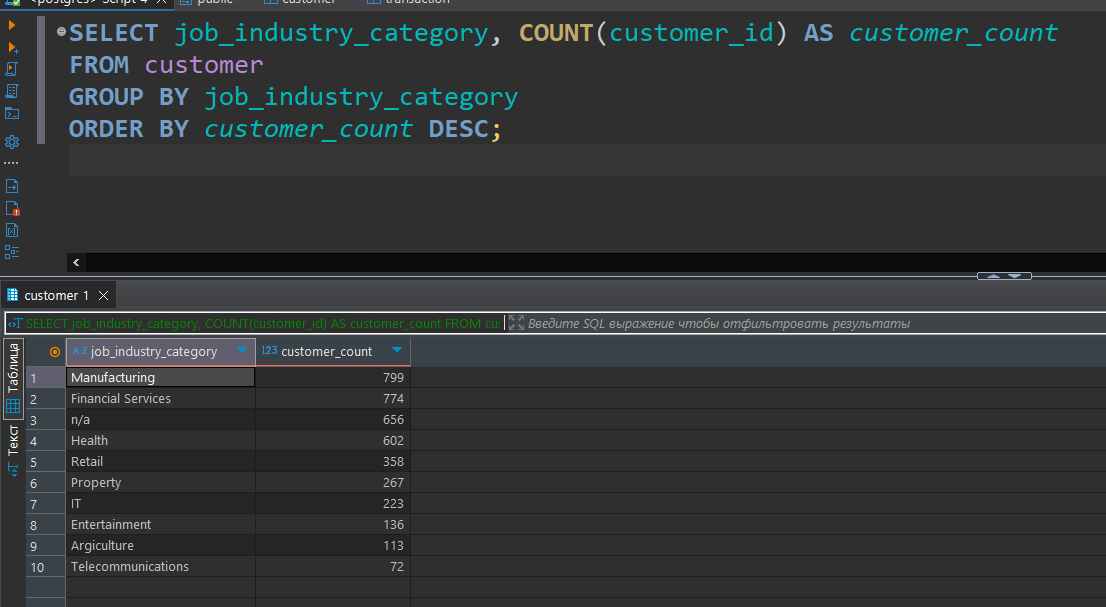

In [14]:
customer.groupby('job_industry_category')['customer_id'].count().sort_values(ascending=False)

,customer_id
job_industry_category,
Manufacturing,799
Financial Services,774
Health,602
Retail,358
Property,267
IT,223
Entertainment,136
Argiculture,113
Telecommunications,72


2. Найти сумму транзакций за каждый месяц по сферам деятельности, отсортировав по месяцам и по сфере деятельности. — (1 балл)

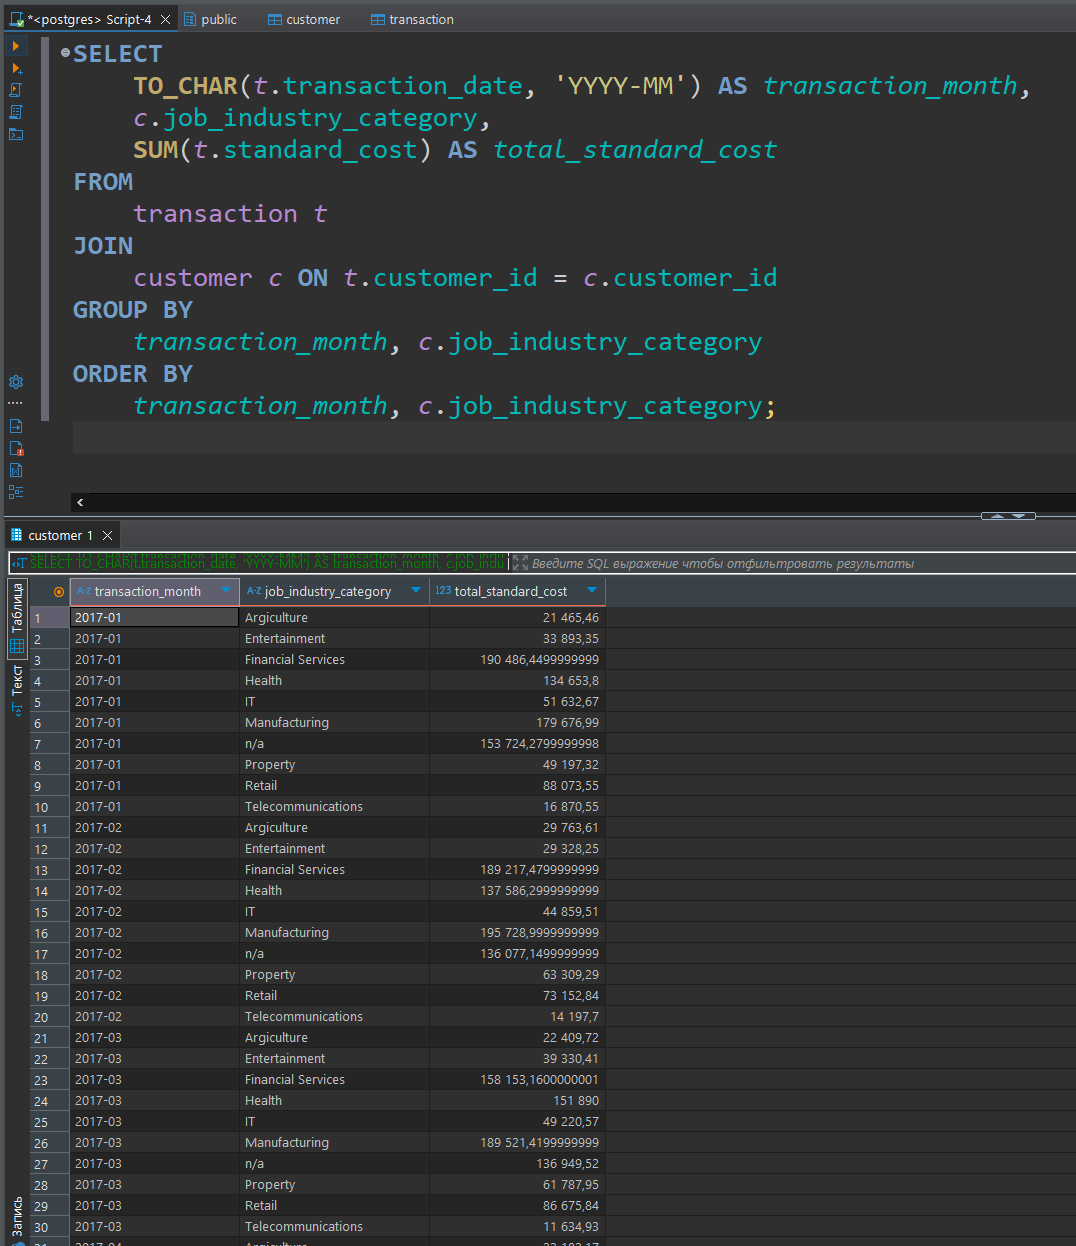

In [27]:
# на всякий случай проверим минимальную и максимальную даты
print(transaction['transaction_date'].min())
print(transaction['transaction_date'].max())

2017-01-01 00:00:00
2017-12-30 00:00:00


In [135]:
transaction.merge(
    customer, on='customer_id'
    ).groupby(
        [transaction['transaction_date'].dt.to_period('M'), 'job_industry_category']
        )['standard_cost'].sum().reset_index().sort_values(['transaction_date', 'job_industry_category'])



,transaction_date,job_industry_category,standard_cost
0,2017-01,Argiculture,18825.14
1,2017-01,Entertainment,36998.23
2,2017-01,Financial Services,198027.87
3,2017-01,Health,136431.78
4,2017-01,IT,51260.40
...,...,...,...
103,2017-12,IT,39697.33
104,2017-12,Manufacturing,169761.69
105,2017-12,Property,54438.39
106,2017-12,Retail,70611.03


3. Вывести количество онлайн-заказов для всех брендов в рамках подтвержденных заказов клиентов из сферы IT. — (1 балл)

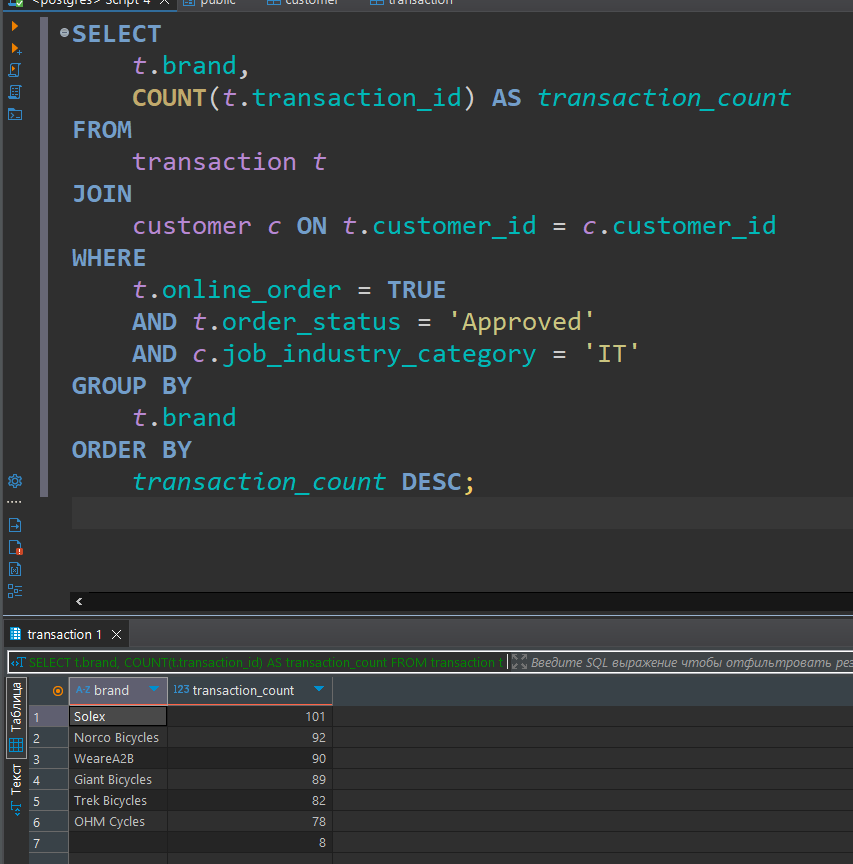

In [79]:
merged = transaction.merge(customer, on='customer_id')
merged[
    (merged['online_order']==True) &
    (merged['order_status']=='Approved') &
    (merged['job_industry_category']=='IT')].groupby(
        ['brand']
    )['transaction_id'].count()



,transaction_id
brand,
Giant Bicycles,89
Norco Bicycles,92
OHM Cycles,78
Solex,101
Trek Bicycles,82
WeareA2B,90


4. Найти по всем клиентам сумму всех транзакций (list_price), максимум, минимум и количество транзакций, отсортировав результат по убыванию суммы транзакций и количества клиентов. Выполните двумя способами: используя только group by и используя только оконные функции. Сравните результат. — (2 балла)


# GroupBY

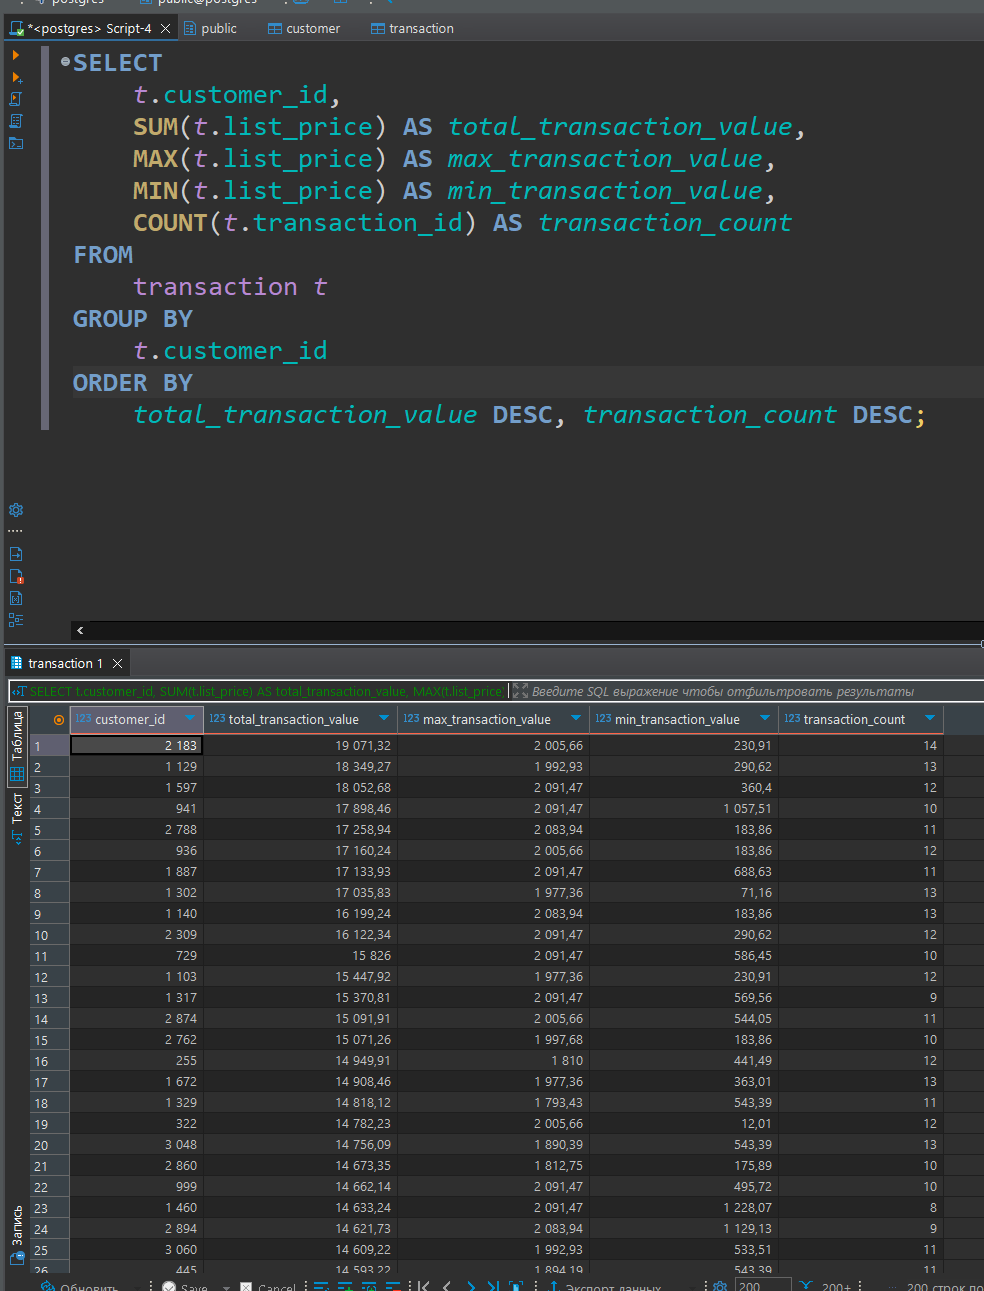

# Оконные функции

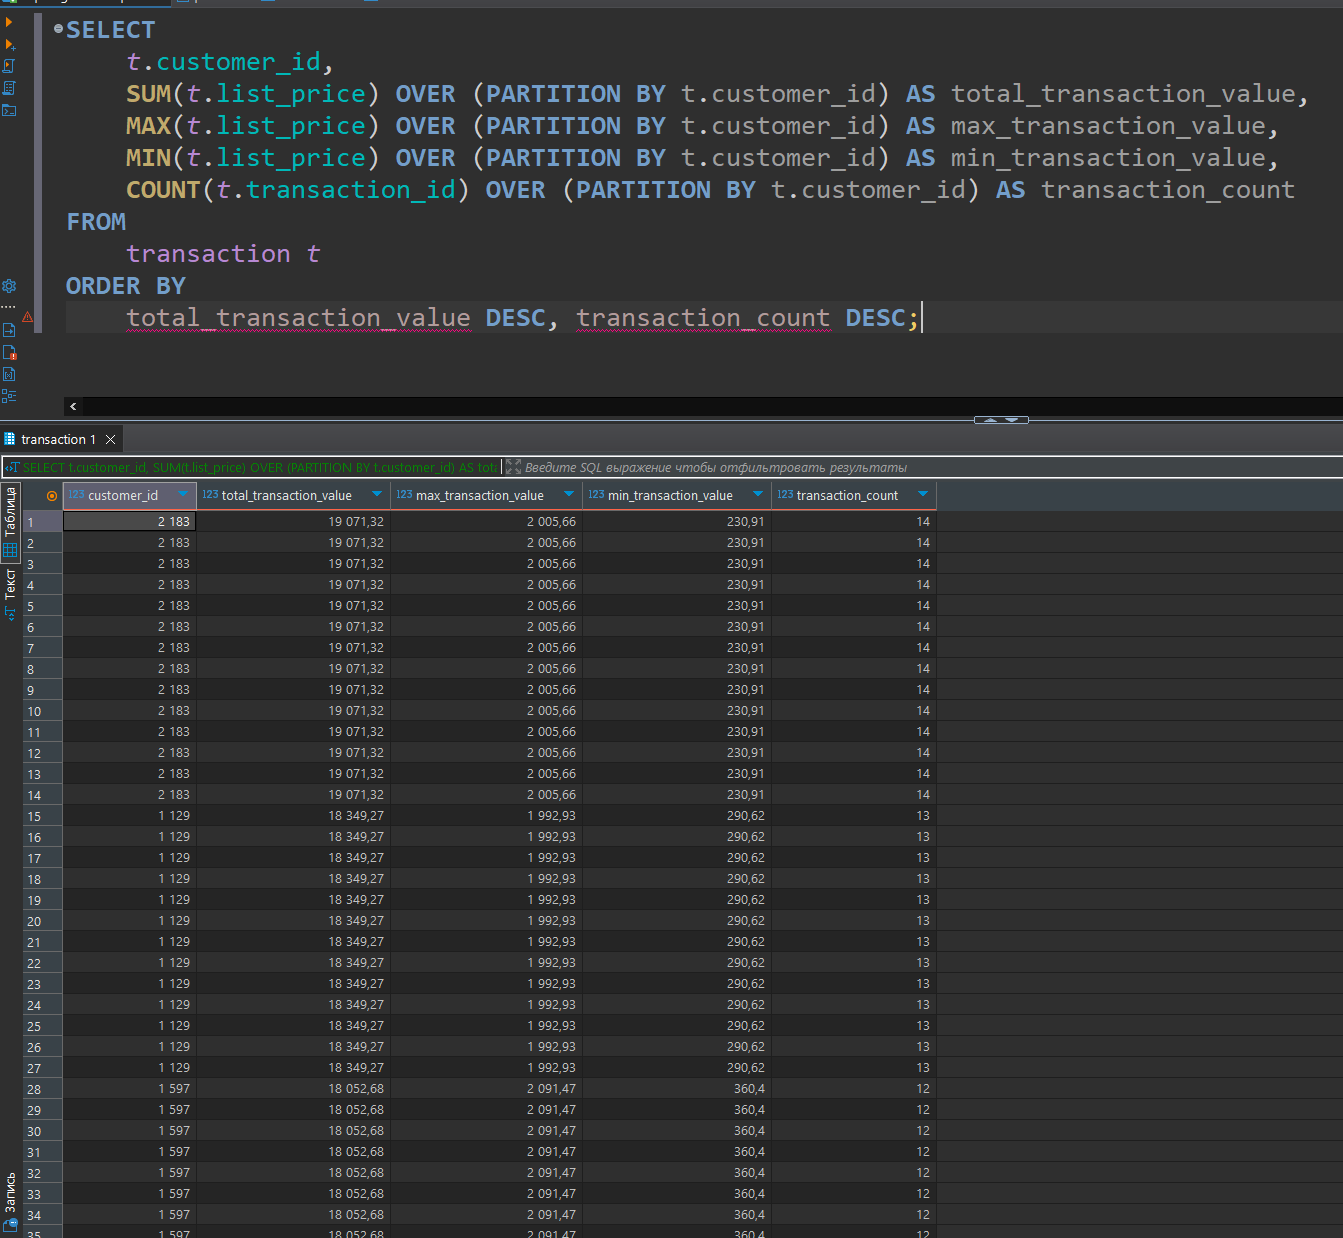

In [81]:
# через groupby
merged.groupby(['customer_id'])['list_price'].agg(['max', 'min', 'count']).sort_values('max', ascending=False)

,max,min,count
customer_id,,,
1979,2091.47,478.16,5
2580,2091.47,71.49,8
738,2091.47,363.01,8
3162,2091.47,642.70,2
2007,2091.47,1129.13,4
...,...,...,...
2855,183.86,71.49,2
3189,100.35,100.35,2
2274,71.49,71.49,2


In [100]:
# эмулируем оконные функции
res = merged[['customer_id', 'list_price']].copy()

res['max'] = res.groupby('customer_id')['list_price'].transform('max')
res['min'] = res.groupby('customer_id')['list_price'].transform('min')
res['count'] = res.groupby('customer_id')['list_price'].transform('count')

res.drop('list_price', axis=1, inplace=True)

res.sort_values('max', ascending=False)

,customer_id,max,min,count
19996,1144,2091.47,183.86,7
14106,294,2091.47,416.98,7
3903,1462,2091.47,71.16,6
14144,1887,2091.47,688.63,11
14141,468,2091.47,71.49,6
...,...,...,...,...
12292,3189,100.35,100.35,2
16610,2274,71.49,71.49,2
5903,2274,71.49,71.49,2
6532,2532,71.49,71.49,1


5. Найти имена и фамилии клиентов с минимальной/максимальной суммой транзакций за весь период (сумма транзакций не может быть null). Напишите отдельные запросы для минимальной и максимальной суммы. — (2 балла)


# Максимум

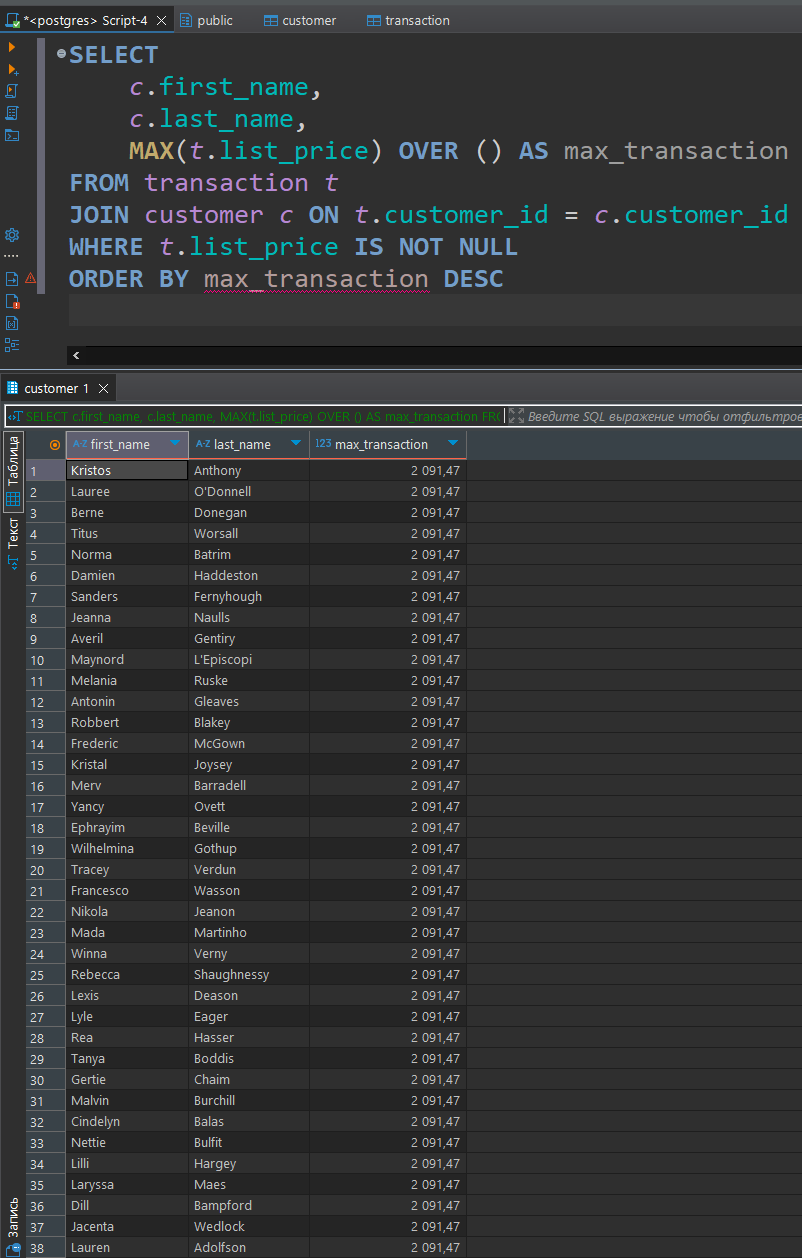

# Минимум

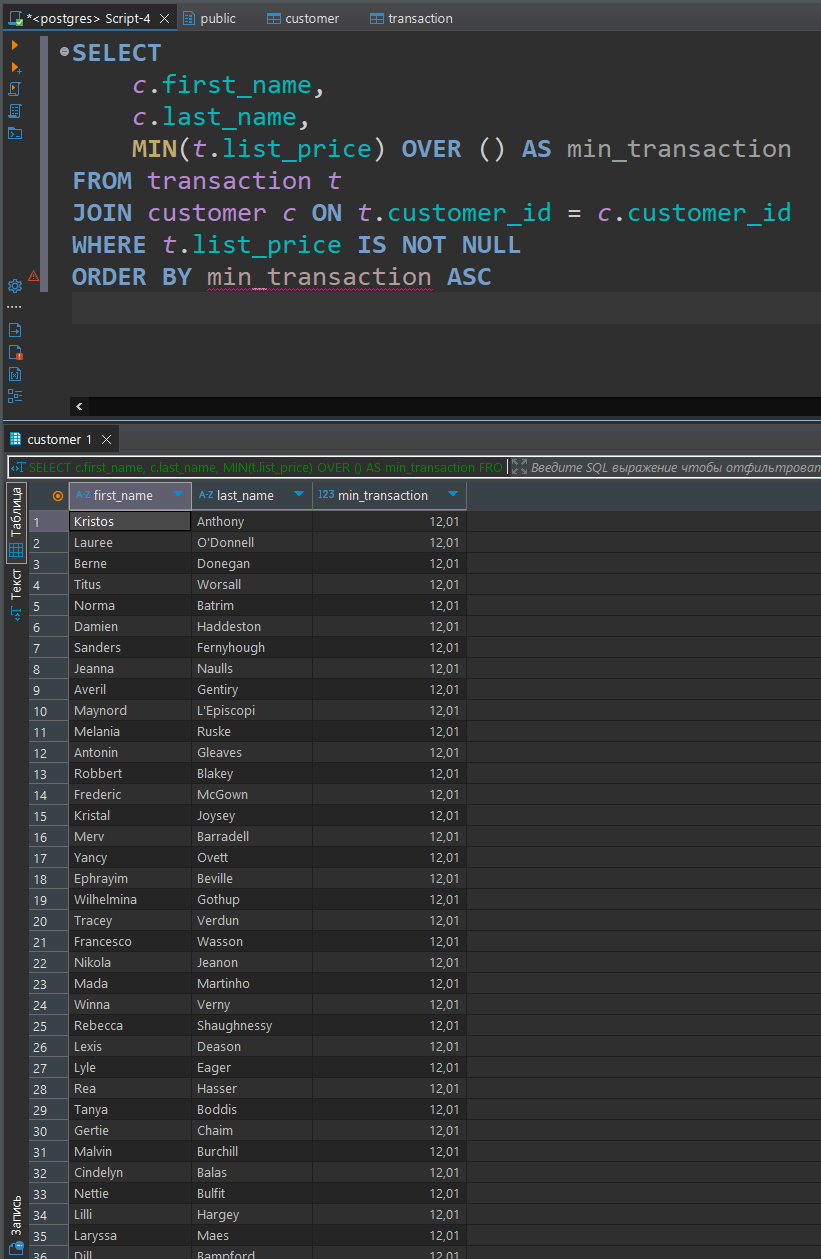

In [117]:
maximum = merged['list_price'].max()
minimum = merged['list_price'].min()
merged[
    (merged['list_price']==maximum) |
    (merged['list_price']==minimum)][['first_name', 'last_name', 'list_price']]

,first_name,last_name,list_price
1,Lauree,O'Donnell,2091.47
15,Merv,Barradell,2091.47
60,Faythe,Rance,12.01
68,Wendel,Headland,2091.47
88,Annamarie,Bouzan,12.01
...,...,...,...
19891,Jordanna,Skyme,2091.47
19908,Johan,Dudderidge,2091.47
19917,Tucky,Pizzie,2091.47
19930,Diane,Busk,12.01


6. Вывести только самые первые транзакции клиентов. Решить с помощью оконных функций. — (1 балл)

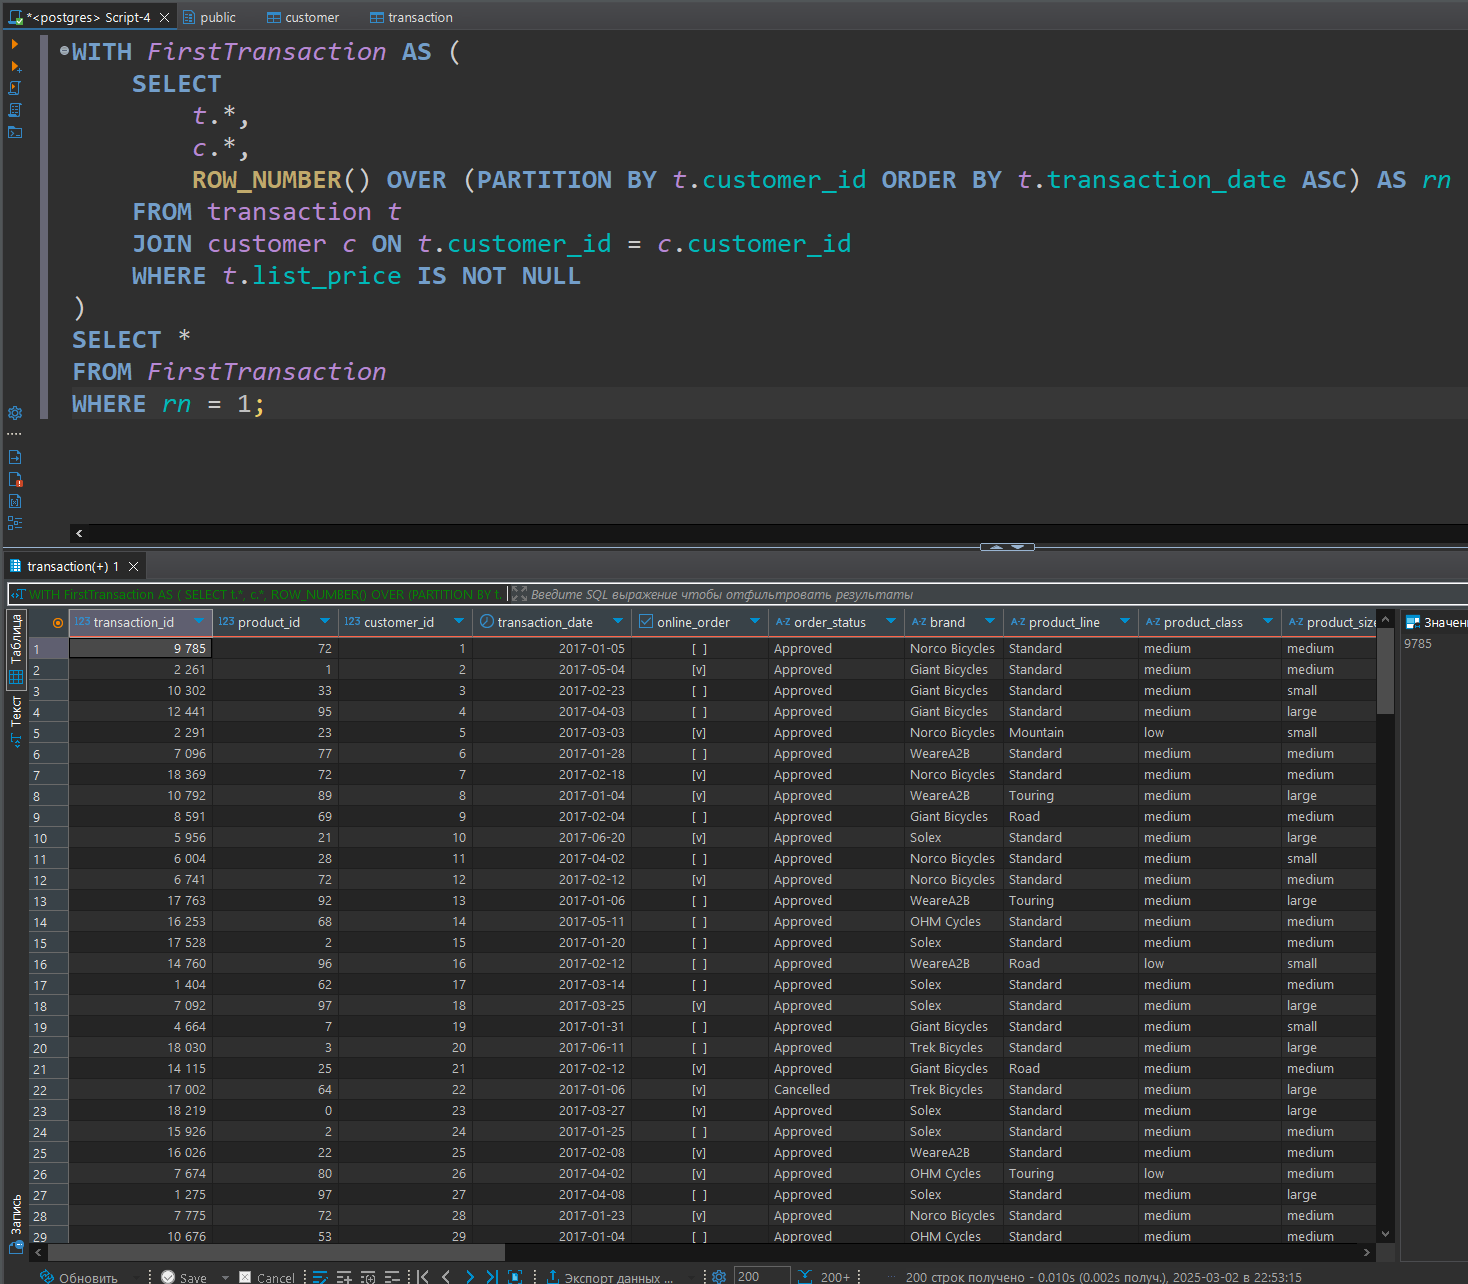

In [128]:
res = merged.sort_values(['customer_id', 'transaction_date'])
res['first_transaction'] = res.groupby('customer_id')['transaction_date'].transform('min')
first_transactions = res[res['transaction_date'] == res['first_transaction']]

first_transactions.drop(columns=['first_transaction'], inplace=True)
first_transactions

<ipython-input-128-22094b13f321>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_transactions.drop(columns=['first_transaction'], inplace=True)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
9783,9785,72,1,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,...,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
2260,2261,1,2,2017-05-04,True,Approved,Giant Bicycles,Standard,medium,medium,...,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
10300,10302,33,3,2017-02-23,False,Approved,Giant Bicycles,Standard,medium,small,...,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9
12439,12441,95,4,2017-04-03,False,Approved,Giant Bicycles,Standard,medium,large,...,NaN,IT,Mass Customer,N,No,17979 Del Mar Point,2448,New South Wales,Australia,4
2290,2291,23,5,2017-03-03,True,Approved,Norco Bicycles,Mountain,low,small,...,Senior Editor,NaN,Affluent Customer,N,Yes,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9767,9769,5,3496,2017-03-07,False,Approved,Trek Bicycles,Mountain,low,medium,...,Editor,Manufacturing,Mass Customer,N,Yes,9491 Green Ridge Terrace,2100,NSW,Australia,10
8275,8276,18,3497,2017-09-01,True,Approved,Solex,Standard,medium,medium,...,Administrative Assistant IV,Manufacturing,Affluent Customer,N,Yes,16 Carberry Pass,2119,NSW,Australia,11
13467,13469,12,3498,2017-02-03,True,Approved,WeareA2B,Standard,medium,medium,...,NaN,Manufacturing,Mass Customer,N,No,12 Elgar Place,2155,NSW,Australia,10
2793,2794,62,3499,2017-01-12,False,Approved,Solex,Standard,medium,medium,...,NaN,Manufacturing,Mass Customer,N,Yes,8749 Menomonie Point,2122,NSW,Australia,11


7. Вывести имена, фамилии и профессии клиентов, между транзакциями которых был максимальный интервал (интервал вычисляется в днях) — (2 балла).

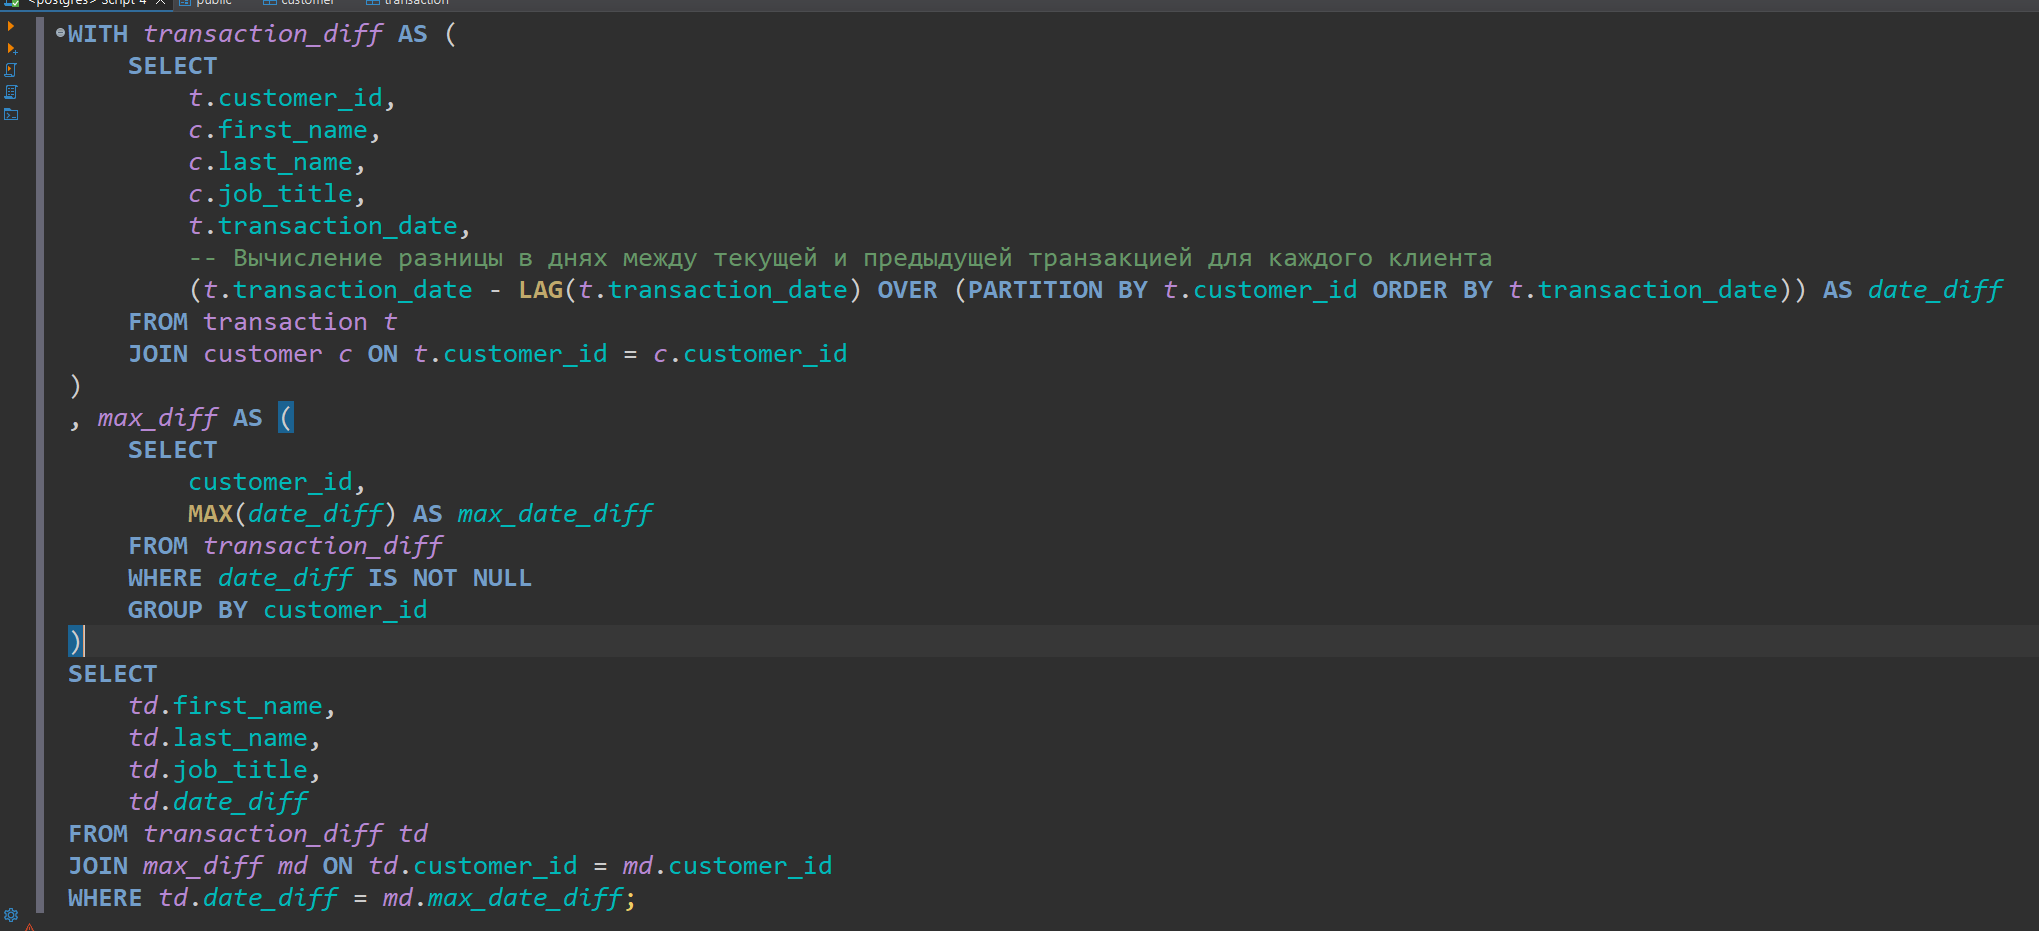

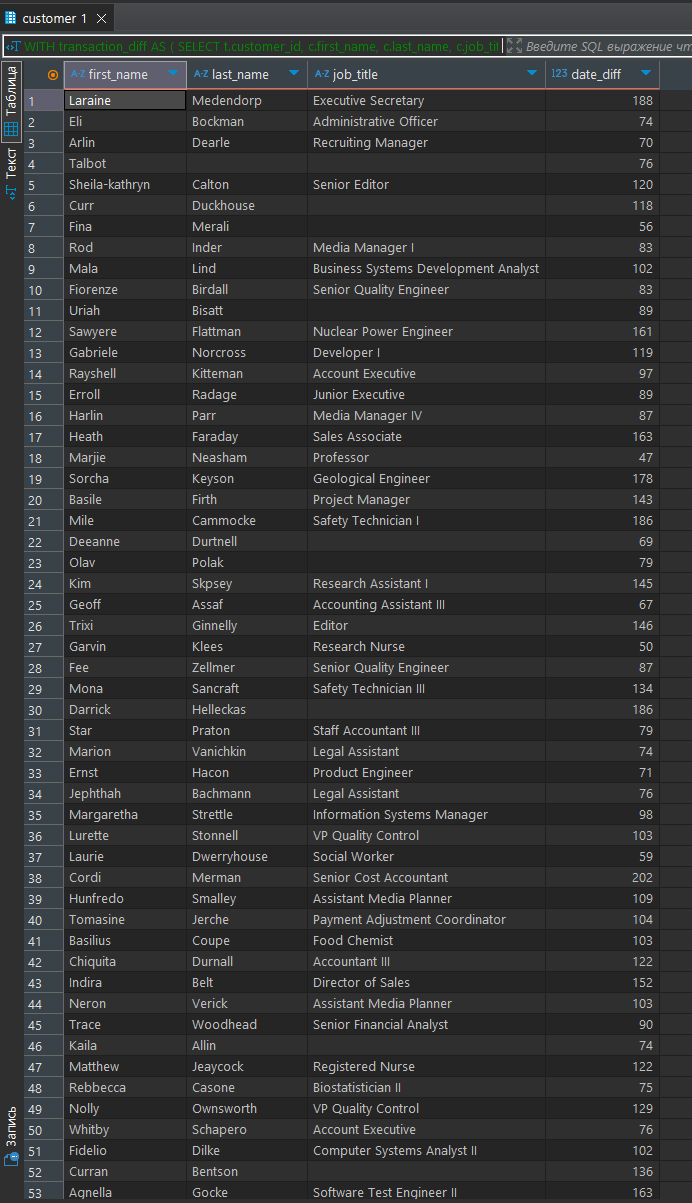

In [134]:
res = merged.sort_values(by=['customer_id', 'transaction_date']).copy()

res['date_diff'] = res.groupby('customer_id')['transaction_date'].diff().dt.days

max_diff = res.groupby('customer_id')['date_diff'].max()

res_max_diff = res[res['date_diff'] == res['customer_id'].map(max_diff)]

res_max_diff[['first_name', 'last_name', 'job_title', 'date_diff']]


,first_name,last_name,job_title,date_diff
16421,Laraine,Medendorp,Executive Secretary,188.0
16409,Eli,Bockman,Administrative Officer,74.0
13283,Arlin,Dearle,Recruiting Manager,70.0
14646,Talbot,NaN,NaN,76.0
7691,Sheila-kathryn,Calton,Senior Editor,120.0
...,...,...,...,...
18793,Danya,Burnyeat,Editor,26.0
6925,Thia,O'Day,Administrative Assistant IV,57.0
15664,Lois,Abrahim,NaN,106.0
18399,Shelton,Tewkesberrie,NaN,140.0
